<a href="https://colab.research.google.com/github/BAHAMLAOUHI/NLP/blob/main/Sentiment%20Analysis/Sentiment_Analysis_using_bow_and_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
df = pd.read_csv('reviews.csv')
df.head()

,Id,Review,Label
0,0,good and interesting,5
1,1,"This class is very helpful to me. Currently, I...",5
2,2,like!Prof and TAs are helpful and the discussi...,5
3,3,Easy to follow and includes a lot basic and im...,5
4,4,Really nice teacher!I could got the point eazl...,4


In [4]:
df.shape

(107018, 3)

In [5]:
df['Review'].values[10]

"Is there any reason why you should not apply the course by BCG?)It's content is pretty unique and includes a high level analysis and a wide range of knowledge needed to cover all detailed aspects.Best regards,Oleg Serov"

In [6]:
df['Label'].value_counts()

,count
Label,
5,79173
4,18054
3,5071
1,2469
2,2251


Text(0, 0.5, 'Frequency')

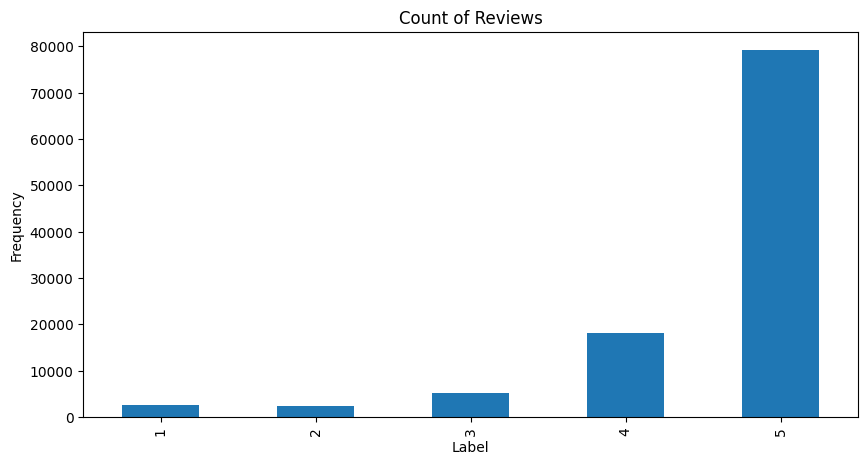

In [7]:
df['Label'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews', figsize=(10, 5)  )
plt.xlabel('Label')
plt.ylabel('Frequency')

In [8]:
example=df['Review'].values[30]
print(example)

Well-presented contents with comprehensive illustrations and easy to follow, cover in proper order every aspect of drawing and AutoCAD. Would appreciate if the English subtitle is available in the whole course, so more students could access to these handy lectures and exercises.


In [9]:
df.isnull().sum()

,0
Id,0
Review,0
Label,0


In [10]:
df.duplicated().sum()

0

# Text PreProcessing

In [11]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
from nltk.stem import PorterStemmer
port_stem=PorterStemmer()

In [15]:
import re

this variable helps us to see the stemming process of the first example

In [16]:
i=0

In [17]:
def stemming(content):
  global i

  if i ==0:
    print(content)
  stemmed_content=re.sub('[^a-zA-Z]',' ',content)
  if i ==0:
    print(stemmed_content)
  stemmed_content=stemmed_content.lower()
  if i ==0:
    print(stemmed_content)
  stemmed_content=stemmed_content.split()
  if i ==0:
    print(stemmed_content)
  stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  if i ==0:
    print(stemmed_content)
  stemmed_content=' '.join(stemmed_content)
  if i ==0:
    print(stemmed_content)
  i+=1

  return stemmed_content

In [18]:
df['stemmed_tweet']=df['Review'].apply(stemming)

good and interesting
good and interesting
good and interesting
['good', 'and', 'interesting']
['good', 'interest']
good interest


In [19]:
df.head()

,Id,Review,Label,stemmed_tweet
0,0,good and interesting,5,good interest
1,1,"This class is very helpful to me. Currently, I...",5,class help current still learn class make lot ...
2,2,like!Prof and TAs are helpful and the discussi...,5,like prof ta help discuss among student quit a...
3,3,Easy to follow and includes a lot basic and im...,5,easi follow includ lot basic import techniqu u...
4,4,Really nice teacher!I could got the point eazl...,4,realli nice teacher could got point eazliy v


# Splitting Data For training

In [20]:
X=df['stemmed_tweet'].values
y=df['Label'].values

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [22]:
print("shape of X_tarin",X_train.shape)
print("shape of X_test",X_test.shape)
print("shape of y_train",y_train.shape)
print("shape of y_test",y_test.shape)

shape of X_tarin (85614,)
shape of X_test (21404,)
shape of y_train (85614,)
shape of y_test (21404,)


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

vectorizer = CountVectorizer()

X_train_bow = vectorizer.fit_transform(X_train)


In [29]:
# Summarize the vectorizer
# Vocabulary size (number of unique tokens)

print("Vocabulary:", vectorizer.get_feature_names_out())
print("Vocabulary size:", len(vectorizer.get_feature_names_out()))
print("Review size:", len(X_train))

# Feature names (the words in the vocabulary)
feature_names = vectorizer.get_feature_names_out()
print(f'First 10 features (words): {feature_names[:10]}')

# Example of how a few samples are represented
print("Sample vectorized representation (first 5 rows):")
print(X_train_bow[:5].toarray())

Vocabulary: ['aa' 'aaa' 'aaaa' ... 'zweig' 'zwetsloot' 'zyad']
Vocabulary size: 19345
Review size: 85614
First 10 features (words): ['aa' 'aaa' 'aaaa' 'aaargh' 'aaha' 'aalaikom' 'aalst' 'aand' 'aarabi'
 'aaron']
Sample vectorized representation (first 5 rows):
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Training and testing our model

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_bow, y_train)



LogisticRegression(max_iter=1000)

In [34]:
X_test_bow = vectorizer.transform(X_test)

In [35]:
y_pred = model.predict(X_test_bow)

accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy * 100:.2f}%')

Logistic Regression Accuracy: 76.81%


In [47]:
example=df['Review'].values[18860]
example

'Decent course content, but fairly basic. However, the peer graded evaluations are subjective and take too long to get feedback and progress in coursework. I will not be taking another course that uses this loose of a peer evaluation.'

In [48]:
yexample=df['Label'].values[18860]
yexample

1

In [49]:
exmple_stemmed=df['stemmed_tweet'].values[18860]
exmple_stemmed

'decent cours content fairli basic howev peer grade evalu subject take long get feedback progress coursework take anoth cours use loos peer evalu'

In [51]:
exmp_bow=vectorizer.transform([exmple_stemmed])

In [52]:
y_exmple=model.predict(exmp_bow)

In [53]:
y_exmple

array([3])